In [2]:
from manim import *

Manim Community v0.16.0

In [3]:
config.media_width = "100%"
config.media_embed = True

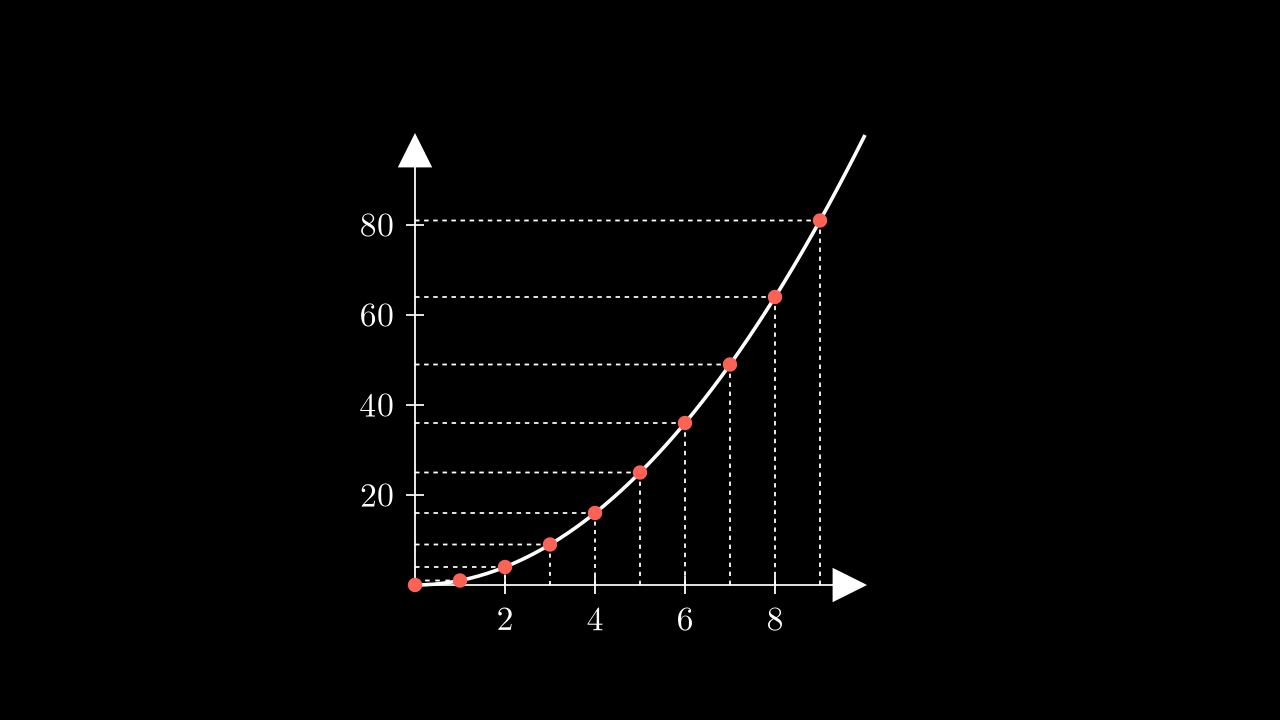

In [4]:
%%manim -qm -v WARNING Test2DPlot

class Test2DPlot(Scene):
    def setup(self):
        axes = Axes(
            x_range=(0, 10, 2),
            y_range=(0, 100, 20),
            x_length=5,
            y_length=5,
            axis_config={
                "include_numbers":True,
                
            }
        )
        graph = axes.plot(lambda x: x**2, x_range=[0,10])
        self.add(axes, graph)
        x = [i for i in range(10)]
        dots = [Dot(axes.c2p(i, i**2), color=RED) for i in x]
        vertical_lines = [axes.get_vertical_line(axes.c2p(i, i**2)) for i in x]
        horizontal_lines = [axes.get_horizontal_line(axes.c2p(i, i**2)) for i in x]
        self.add( *vertical_lines, *horizontal_lines, *dots)
        

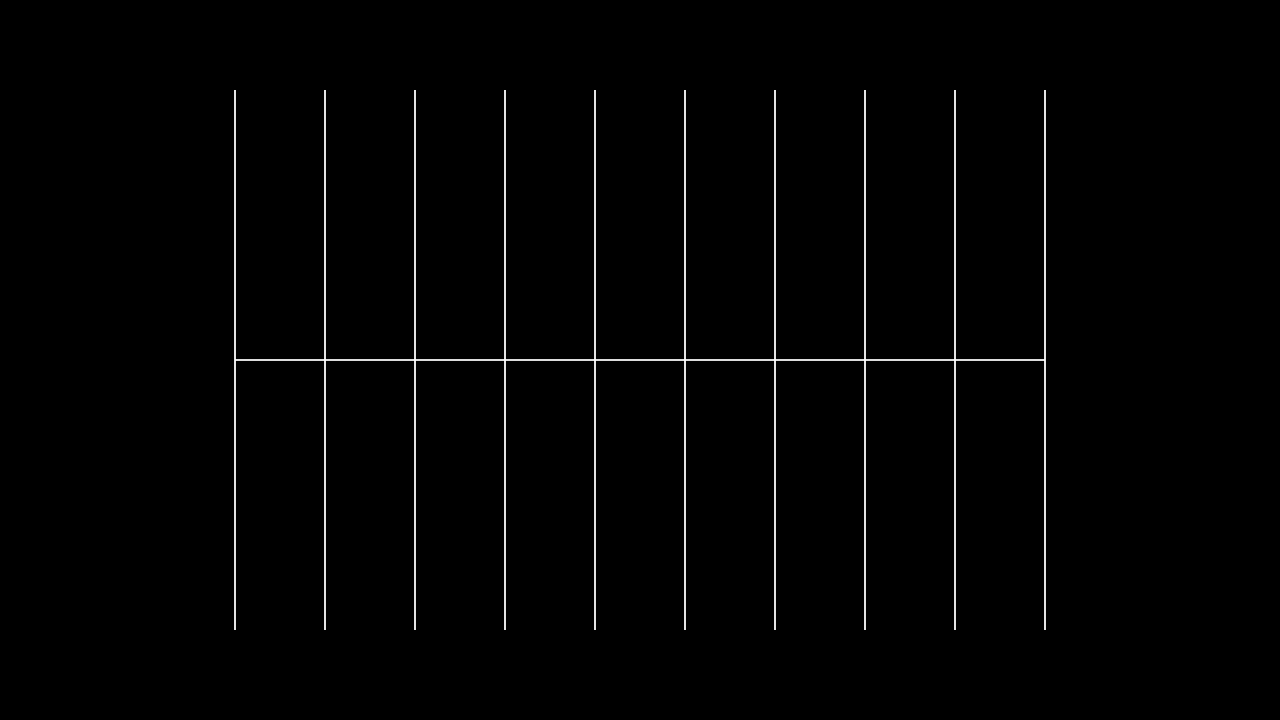

In [5]:
%%manim -qm -v WARNING TestNumberLine

class TestNumberLine(Scene):
    def setup(self):
        number = NumberLine(
            x_range=[1,10,1],
            tick_size=3
        )
        self.add(number)

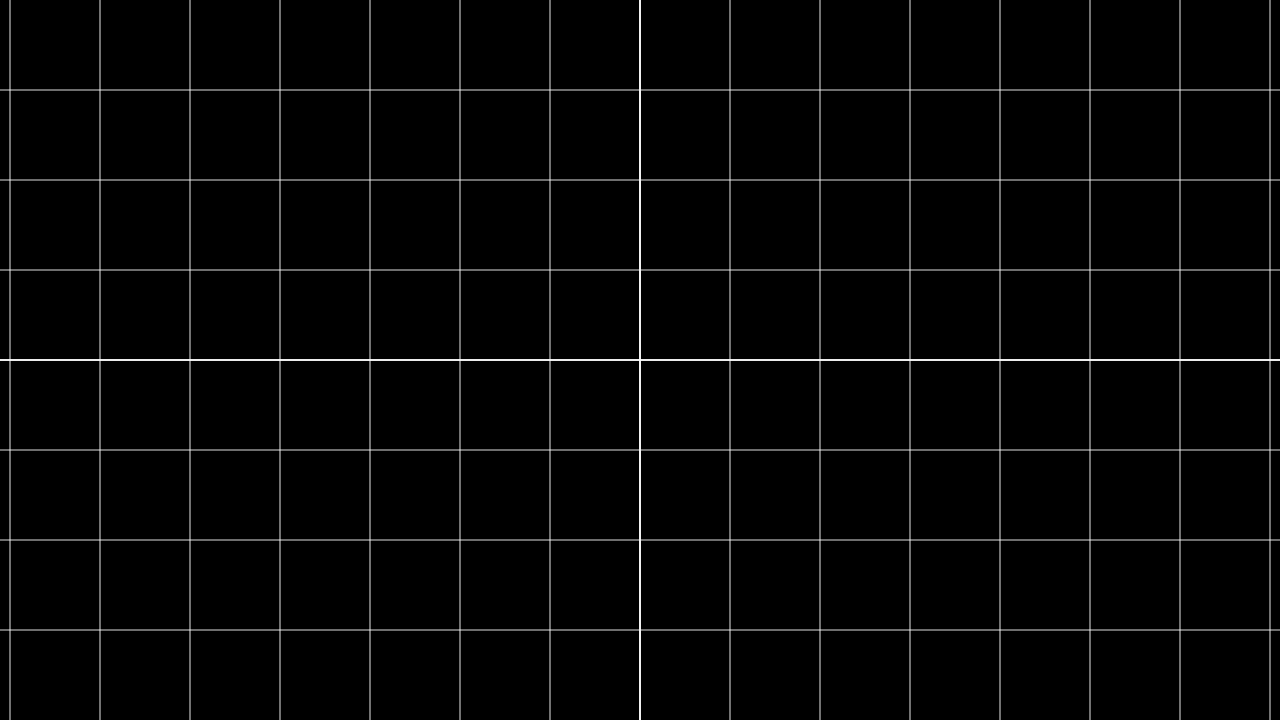

In [6]:
%%manim -qm -v WARNING TestNumberPlane

class TestNumberPlane(Scene):
    def setup(self):
        plane = NumberPlane(
            background_line_style={
                "stroke_color":WHITE,
                "stroke_opacity":0.5
            }
        )
        self.add(plane)

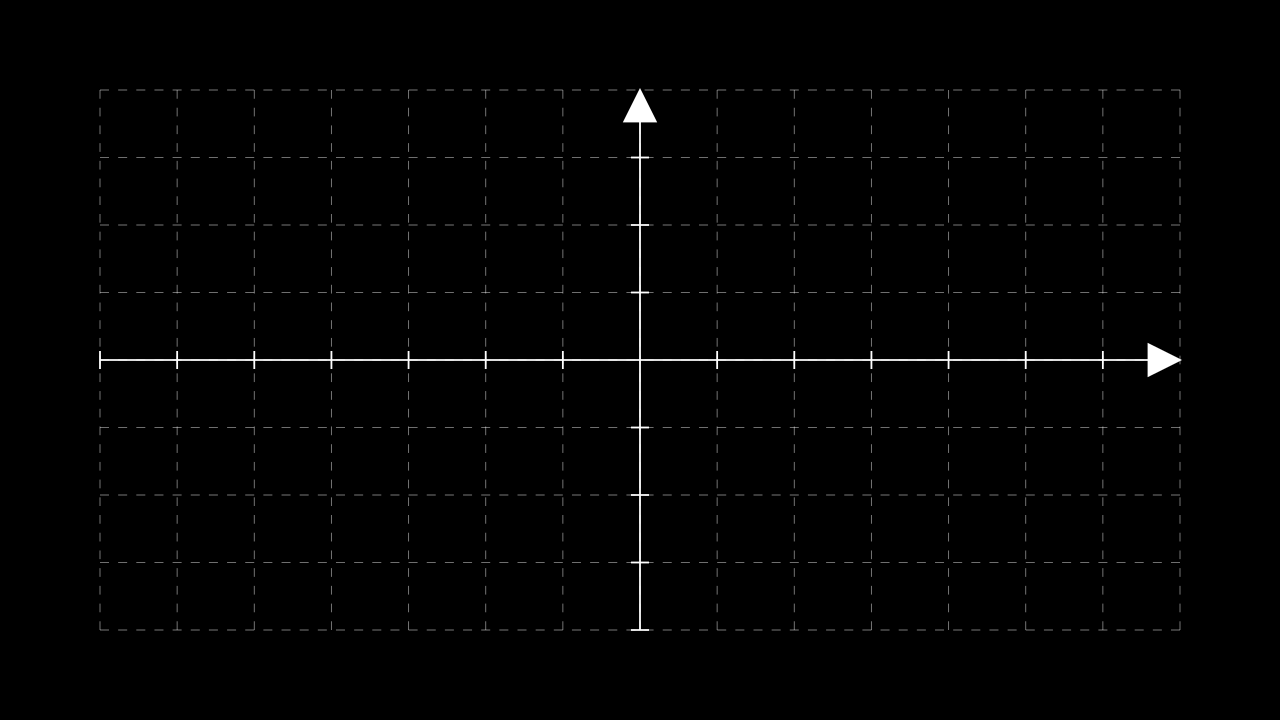

In [7]:
%%manim -qm -v WARNING Ex1
from common.utils import range_utils

class Ex1(Scene):
    def setup(self):
        axes = Axes()
        self.add(axes)
        x_start, x_end, x_step = axes.x_range
        y_start, y_end, y_step = axes.y_range
        kwargs_line = {"stroke_opacity":0.5, "dash_length":0.1, "stroke_width":1}
        
        vertical_start = [axes.c2p(i, y_start) for i in range_utils.real_range(x_start, x_end, include=[True, True])]
        vertical_end = [axes.c2p(i, y_end) for i in range_utils.real_range(x_start, x_end, include=[True, True])]
        vertical_line = VGroup(*[DashedLine(i,j, **kwargs_line) for i,j in zip(vertical_start, vertical_end)])
        
        horizontal_start = [axes.c2p(x_start, i) for i in range_utils.real_range(y_start, y_end, include=[True, True])]
        horizontal_end = [axes.c2p(x_end, i) for i in range_utils.real_range(y_start, y_end, include=[True, True])]
        horizontal_line = VGroup(*[DashedLine(i,j, **kwargs_line) for i,j in zip(horizontal_start, horizontal_end)])
        self.add(vertical_line, horizontal_line)


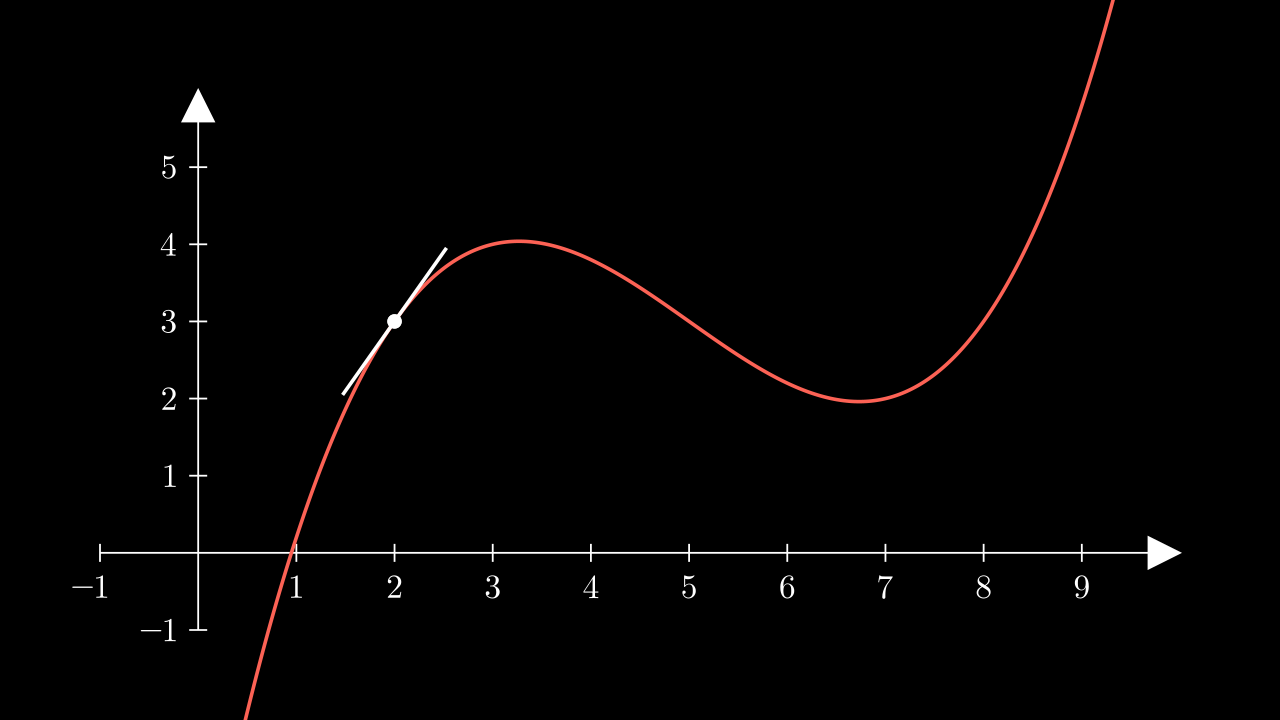

In [8]:
%%manim -qm -v WARNING Ex2

class Ex2(Scene):
    def setup(self):
        axis_config = {"include_numbers": True}
        axes = Axes(
            x_range=[-1,10,1],
            y_range=[-1,6,1],
            axis_config = axis_config
        )
        func = lambda x: 0.1 * (x - 2) * (x - 8) * (x - 5) + 3
        plot = axes.plot(func, x_range=[0,10,0.01], use_smoothing=True, color=RED)
        dot1 = Dot(axes.i2gp(2, plot))
        dot2 = Dot(axes.i2gp(2.000000001, plot))
        angle = angle_of_vector(dot2.get_center() - dot1.get_center())
        line = Line().move_to(dot1).rotate(angle)
        self.add(axes, plot, dot1, dot2, line)

In [9]:
%%manim -qm -v WARNING Ex3
import math
from common.utils.range_utils import real_range

class Ex3(Scene):
    def setup(self):
        self.axes = Axes(
            x_range=[-1,13,1],
            y_range=[-2,6,2]
        )
        self.graph = self.axes.plot(lambda x: math.sqrt(x), x_range=[0,13,0.01])
        self.add(self.axes, self.graph)
    
    def create_rectangle(self, x, smoth):
        dl = self.axes.c2p(x,0)
        dr = self.axes.c2p(x+smoth,0)
        ul = self.axes.i2gp(x, self.graph)
        ur = [dr[0], ul[1], 0]
        return VMobject(stroke_width=0, fill_opacity=1).set_points_as_corners([dl, dr, ur, ul, dl])
    
    def construct(self):
        poww = [x**2.4 for x in range(2,10)]
        smoths = [1/x for x in poww]
        smoth = 1
        cols = VGroup(*[self.create_rectangle(x, smoth).set_color(color=interpolate_color(YELLOW, RED, x/12)) for x in real_range(1, 12, smoth)])
        self.add(cols)
        self.wait()
        for smoth in smoths:
            new_cols = VGroup(*[self.create_rectangle(x, smoth).set_color(color=interpolate_color(YELLOW, RED, x/12)) for x in real_range(1, 12, smoth)])
            self.play(Transform(cols, new_cols))
            self.wait()
        


In [10]:
%%manim -qm -v WARNING Ex4

class Ex4(Scene):
    def setup(self):
        self.axes = Axes(
            x_range=[-1, 10, 1],
            y_range=[-1, 6, 1],
            axis_config={
                "include_numbers":True,
            }
        )
        func = lambda x: 0.1 * (x - 2) * (x - 8) * (x - 5) + 3
        self.plot = self.axes.plot(func, x_range=[1,9, 0.05], color=RED)
        self.add(self.axes)
    
    def construct(self):
        x = [i for i in range(1,10)]
        dot = [Dot(self.axes.c2p(i,0), color=YELLOW) for i in x]
        for i in dot:
            i.generate_target()
        arrow = [Arrow(i.get_center(), i.get_center()) for i in dot]
        dot_target = [i.target.move_to(self.axes.i2gp(x[index], self.plot)) for index, i in enumerate(dot)]
        arrow_target = [Arrow(i.get_center(), j.get_center()) for i,j in zip(dot, dot_target)]
        self.add(*dot)
        self.wait()
        self.play(*[
            Transform(i, j) for i, j in zip(dot, dot_target)
        ], *[
            Transform(i, j) for i, j in zip(arrow, arrow_target)
        ], run_time=3)
        self.play(FadeOut(*arrow))
        self.play(Create(self.plot), run_time=3)
        self.wait()
        

        

In [11]:
%%manim -qm -v WARNING Ex5

class Ex5(Scene):
    def setup(self):
        self.axes = Axes(
            x_range=[-1,6,1],
            y_range=[-1,26,1],
            x_length=5,
            y_length=7,
            axis_config={
                "include_numbers":True,
                "font_size":22
            }
        ).shift(RIGHT*2)
        self.graph = self.axes.plot(lambda x:x**2,x_range=[0,6,0.01])
        self.table = MathTable(
            [[str(i), str(i*i)] for i in range(6)],
            include_outer_lines=True,
            col_labels=[MathTex("x"), MathTex(r"f \left( x \right)={x}^{2}")]
        ).scale(0.7).shift(LEFT*3+UP)
        self.col1, self.col2 = self.table.get_columns()
        self.col1.set_color(color=RED)
        self.col2.set_color(color=BLUE)
        self.table[0].remove(*self.col2[1:])
        self.add(self.axes, self.table)
        
    def construct(self):
        list_f = VGroup(*[MathTex("y=", str(i),"^{2}") for i in range(6)])
        list_f2 = VGroup(*[MathTex(str(i**2))  for i in range(6)])
        lines = VGroup(*[self.axes.get_lines_to_point(self.axes.c2p(i, i**2)) for i in range(6)])
        list_point = [Dot(self.axes.i2gp(i, self.graph)) for i in range(6)]
        list_f.next_to(self.table, DOWN)
        list_f2.move_to(list_f[0][1])
        self.add(list_f[0][0])
        for i in range(6):
            self.play(ReplacementTransform(self.col1[i+1].copy(), list_f[i][1]))
            self.play(Write(list_f[i][2]))
            self.play(ReplacementTransform(list_f[i][2], list_f2[i]), ReplacementTransform(list_f[i][1], list_f2[i]))
            self.play(Transform(list_f2[i], self.col2[i+1]))
            self.play(Transform(self.col2[i+1], list_point[i]), Transform(self.col1[i+1].copy(), list_point[i]), Create(lines[i]))

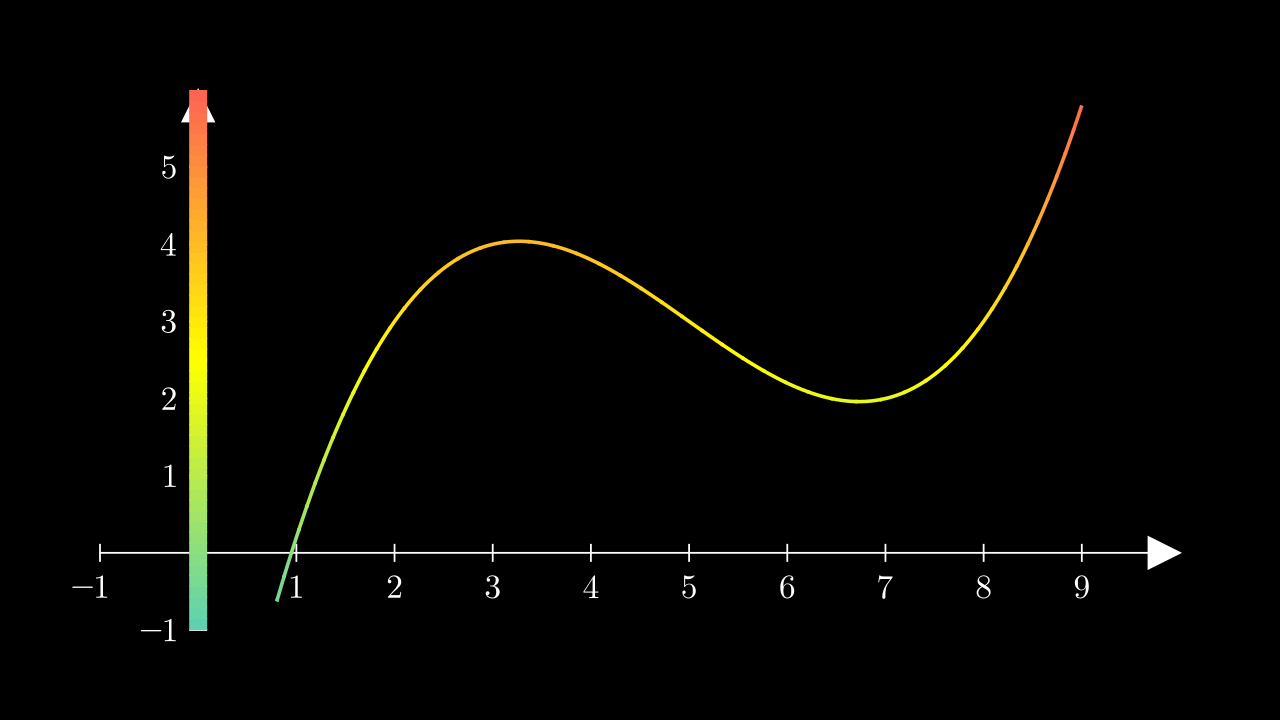

In [12]:
%%manim -qm -v WARNING Ex6
from common.utils.color_utils import interpolate_color_range

class Ex6(Scene):
    
    def setup(self):
        self.axes = Axes(
            x_range=[-1,10,1],
            y_range=[-1,6,1],
            axis_config={
                "include_numbers":True
            }
        )
        self.partical = 51
        color_range = [TEAL, YELLOW, RED]
        vertical = self.axes.get_axes()[1]
        line = DashedVMobject(Line(self.axes.c2p(0,-1), self.axes.c2p(0,6),stroke_width=20),num_dashes=50, dashed_ratio=1.1)
        for i in line:
            y = i.get_center()[1]
            y = self.axes.p2c([0,y,0])[1]
            i.set_color(color=interpolate_color_range(*color_range, (y+1)/7))
        func = lambda x: 0.1 * (x - 2) * (x - 8) * (x - 5) + 3
        plot = self.axes.plot(func, x_range=[0.8,9,0.05])
        line2 = DashedVMobject(plot,num_dashes=50, dashed_ratio=1.1)
        for i in line2:
            y = i.get_center()[1]
            y = self.axes.p2c([0,y,0])[1]
            i.set_color(color=(interpolate_color_range(*color_range,((y+1)/7))))
        self.add(self.axes,line, line2)